In [1]:
from collections import Counter
import numpy as np
import seaborn as sns
import pandas as pd
from nltk import ngrams
import nltk
#nltk.download('words')
import io
import spacy
nlp = spacy.load('en')

import matplotlib.pyplot as plt
%matplotlib inline

### sum up the numbers of vocabulary 

In [3]:
def get_words_list_season(season):
    token_list = []
    with io.open(r'filtered_subtitles/S%s/S%s_all.txt' % (season, season), 'r', encoding='u8') as f:
        text = f.read()
        doc = nlp(text)
        for token in doc:
            token_list.append(token)
    return token_list


def get_words_list_all():
    all_token_list = []
    season_list = [format(i, '02d') for i in range(1, 9)] 
    for season in season_list:
        token_list = get_words_list_season(season)
        all_token_list.extend(token_list)
    return all_token_list 

#get_words_list_season('01')
all_token_list = get_words_list_all()

### sum up the numbers of vocabulary 

In [4]:
words_list = []
english_vocab = set(w.lower() for w in nltk.corpus.words.words())

for token in all_token_list:
    if token.is_punct == False and token.is_space == False and token.is_digit == False:

        if token.text.lower() in english_vocab:
            words_list.append(token.text.lower())



print('numbers of vocabulary in subtitle: %s' % len(set(words_list)))


numbers of vocabulary in subtitle: 11305


### word count

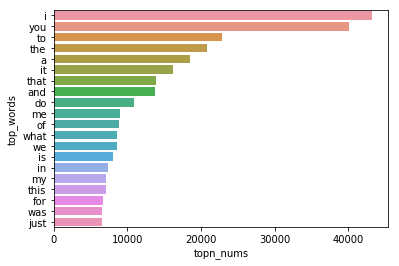

In [7]:
topn = 20
cnt = Counter(words_list)
most_common = cnt.most_common(topn)
top_words = [each[0] for each in most_common]
topn_nums = [each[1] for each in most_common]
df = pd.DataFrame(dict(top_words=top_words, topn_nums=topn_nums))


ax = sns.barplot(x="topn_nums", y="top_words", data=df)


In [9]:
def get_sents_list_season(season):
    sents_list = []
    with io.open(r'filtered_subtitles/S%s/S%s_all.txt' % (season, season), 'r', encoding='u8') as f:
        lines = f.read()
        lines = lines.replace('\n', ' ')
        
        doc = nlp(lines)
        for sent in doc.sents:
            #print('each sent', sent)
            if len(sent) > 0:
                sents_list.append(sent)
                
    sents_token_list = []
    for sent in sents_list:
        token_list = [token for token in sent]
        sents_token_list.append(token_list)
        
    return sents_token_list


def get_sents_list_all():
    sents_token_list_all = []
    season_list = [format(i, '02d') for i in range(1, 11)] 
    for season in season_list:
        sents_token_list_season = get_sents_list_season(season)
        sents_token_list_all.extend(sents_token_list_season)
        
    return sents_token_list_all

#sents_token_list_all = get_sents_list_all()
sents_token_list_season = get_sents_list_season('01')

### N-grams

In [10]:
sents_token_list = sents_token_list_season
sentences = [[token.text.lower() for token in sent if token.is_punct==False and token.is_space==False] for sent in sents_token_list]


def analyze_ngrams(n, sentences):
    cnt = Counter()
    for sent in sentences:
        if len(sent) >= n:
            cnt.update(" ".join(n) for n in ngrams(sent, n))
    
    return cnt

[("i do n't", 335), ("i 'm not", 157), ("i 'm going", 147), ("'m going to", 138), ("do n't know", 124), ("i 'm sorry", 118), ("i ca n't", 112), ("you do n't", 96), ("'re going to", 93), ('what are you', 91), ("it 's not", 79), ("do n't want", 78), ('are you doing', 72), ('you want to', 70), ('going to be', 68), ("i did n't", 68), ("it 's a", 65), ("you 're going", 65), ("you 're not", 64), ("n't want to", 63)]
[("i 'm going to", 138), ("i do n't know", 107), ('what are you doing', 65), ("you 're going to", 59), ("i do n't want", 57), ("do n't want to", 52), ("i do n't think", 38), ('going to have to', 30), ('are you doing here', 28), ("i 'm so sorry", 27), ("i 'm not going", 26), ("we 're going to", 26), ("what 's going on", 25), ('are you going to', 23), ("and i do n't", 22), ("why do n't you", 22), ("do n't know what", 21), ('you want me to', 21), ("'m not going to", 20), ("'m going to go", 20)]


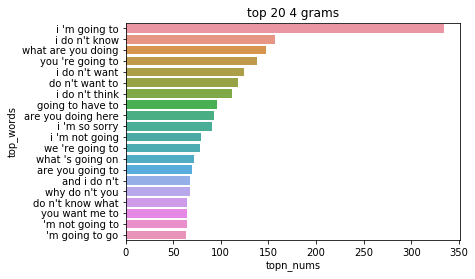

In [12]:
def plot_ngram(N, top_n):
    cnt = analyze_ngrams(N, sentences)
    topn_list = cnt.most_common(top_n)
    topn_words = [each[0] for each in topn_list]
    print(topn_list)
    topn_nums = [each[1] for each in topn_list]
    # print(topn_nums)
    
    df = pd.DataFrame(dict(top_words=topn_words, topn_nums=topn_nums))
    g = sns.barplot(x="topn_nums", y="top_words", data=df)
    g.set_title('top %s %s grams' % (top_n, N))
    
    
plot_ngram(3, 20)
plot_ngram(4, 20)